In [1]:
from transformers import LlavaForConditionalGeneration
import torch
from modules.utils import InstructionFineTuningDataset
from modules.model import get_model, get_processor
import pandas as pd
from PIL import Image
import requests

In [2]:
processor = get_processor(
    image_processor_id="openai/clip-vit-large-patch14", 
    tokenizer_id="microsoft/phi-1_5", 
    image_token="<image>"
    )

In [33]:
checkpoint_path = "./outputs/phi_instruction_final"

In [5]:
model = LlavaForConditionalGeneration.from_pretrained(checkpoint_path)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
model.eval()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

In [8]:
eval_df = pd.read_json("/home/arsalan/Desktop/multimodal_LLM-master/multimodal_LLM-master/data/instruction_finetune/instruction_val_5K_all.json", lines=True)
eval_dataset = InstructionFineTuningDataset(data=eval_df, 
                                                    image_folder_path="/home/arsalan/Desktop/multimodal_LLM-master/multimodal_LLM-master/data/instruction_finetune/"
                                                    )

In [9]:
PHI_CHAT_TEMPLATE = processor.tokenizer.default_chat_template
processor.tokenizer.chat_template = PHI_CHAT_TEMPLATE

In [27]:
instruction0 = eval_dataset[4][0][0]
instruction_template = processor.tokenizer.apply_chat_template([dict(instruction0)],tokenize=False)

In [28]:
instruction_template

'<|im_start|>human\nWhat potential consequences might someone face for not following the prohibitions listed on the street sign?\n<image><|im_end|>\n'

In [25]:
img = eval_dataset[4][1]

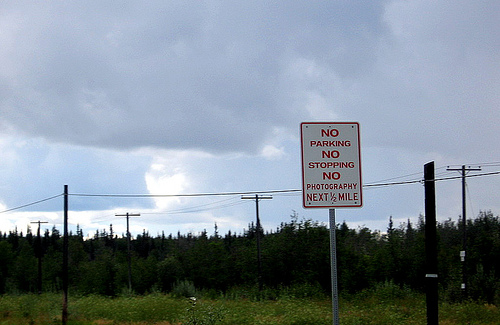

In [26]:
img

In [29]:
inputs = processor(images=img, text=instruction_template, return_tensors="pt", padding=True).to(device)

In [30]:
with torch.no_grad():
    outputs = model.generate(**inputs, max_length=150)

In [32]:
print(processor.tokenizer.decode(outputs[0], skip_special_tokens=True))

<|im_start|>human
What potential consequences might someone face for not following the prohibitions listed on the street sign?
<image><|im_end|>
<|im_start|>gpt
If someone fails to follow the prohibitions listed on the street sign, they may face various consequences. These consequences can include fines, penalties, or even legal action, depending on the severity of the violation. In the image, the street sign prohibits parking in a no-parking zone, and if someone parks in that area, they may be fined or receive a citation. Additionally, if the violation is severe enough, the person may face legal action, such as being towed away or having their vehicle impounded. Failing
